In [1]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [2]:
dogs = pd.read_csv('data/akc.csv')

kids = {1:"High", 2:"Medium", 3:"Low"}
dogs["kids"] = dogs['children'].map(kids)

(sec:eda_relationships)=
# What to Look For in a Relationship

When we investigate multiple variables, we examine the relationships between
them, in addition to their distributions. In this section, we
consider pairs of features and describe what to look for.
{numref}`Table %s <feature-plot>` provides guidelines for the type of plot to make
based on the feature types. 
For two features, the combination of types (both quantitative, both qualitative, or a mix) matters.
We consider each combination in turn.

## Two Quantitative Features

If both features are quantitative, then we often
examine their relationship with a scatter plot.
Each point in a scatter plot
marks the position of a pair of values for an observation.
So, we can think of a scatter plot as a two-dimensional rug plot.

With scatter plots, we look for linear and simple nonlinear relationships, and we examine the strength of the relationship.
We also look to see if a transformation of one or the other or both features leads to a linear relationship.

The scatter plot below displays the weight and height of dog breeds (both are
quantitative). We observe that dogs that are above average in height tend to be
above average in weight. This relationship appears nonlinear: the change in
weight for taller dogs grows faster than for shorter dogs. Indeed, that makes
sense if we think of a dog as basically shaped like a box: for similarly
proportioned boxes, the weight of the contents of the box has a cubic
relationship to its length.

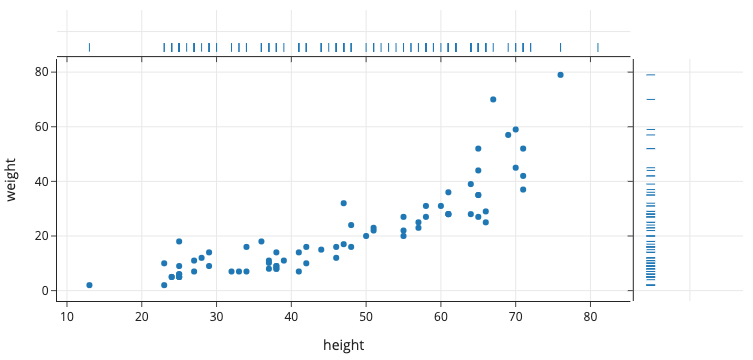

In [4]:
px.scatter(dogs, x='height', y='weight', 
            marginal_x="rug", marginal_y="rug",
            width=350, height=250)

Two Univariate Plots ≠ One Bivariate Plot
: The histograms for two
quantitative features do not contain enough information to create their scatter
plot so we must exercise caution when we read a pair of histograms. That is,
the two histograms do not show how these features vary together. We need to
use one of the plots listed in the appropriate row of
{numref}`Table %s <feature-plot>`
(scatter plot, smooth curve, contour plot, heat map,
quantile-quantile plot) to get a sense of
the relationship between two quantitative features.

When one feature is numeric and the other qualitative, {numref}`Table %s <feature-plot>` makes different recommendations. We describe them next.

## One Qualitative and One Quantitative Variable

To examine the relationship between a quantitative and a qualitative
feature, we often use the qualitative feature to divide the data into groups
and compare the distribution of the quantitative feature across these groups.
For example, we can compare the distribution of height for small, medium
and large dog breeds (see the three overlaid density curves below).
We see that the distribution of height for the
small and medium breeds both appear bimodal, with the left mode the larger
in each group. Also, the small and medium groups have a larger spread in
height than the large group of breeds.

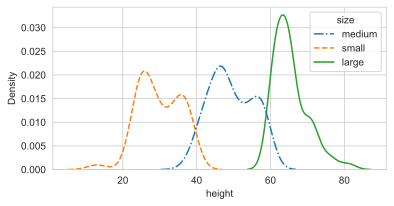

In [5]:
fig = plt.figure(figsize=(6, 3))
p = sns.kdeplot(data=dogs, x='height', hue='size')

lss = ['-', '--', '-.']

handles = p.legend_.legendHandles[::-1]

for line, ls, handle in zip(p.lines, lss, handles):
    line.set_linestyle(ls)
    handle.set_ls(ls)

Side-by-side box plots offer a similar comparison of distributions across
groups. The boxplot offers a simpler approach that can give a crude understanding of a distribution. 
The three boxplots of height, one for each size of dog, make it clear that the size categorization is based on
height because there is almost no overlap in height ranges for the groups. (This was
not evident in the density curves due to the smoothing). What we don't see in
these box plots is the bimodality in the small and medium groups, but we can
still see that the large dogs have a more narrow spread compared to
the other two groups.


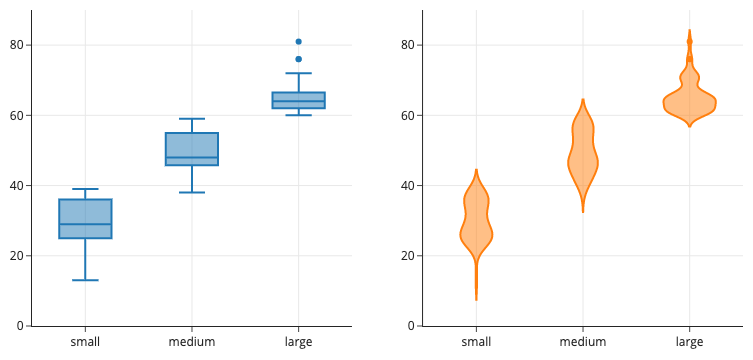

In [6]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Box(x=dogs['size'], y=dogs['height']), row=1, col=1)
fig.add_trace(go.Violin(x=dogs['size'], y=dogs['height']), row=1, col=2)

fig.update_yaxes(range=[0,90])
fig.update_xaxes(categoryarray=["small", "medium", "large"],
                categoryorder = "array")
fig.update_layout(showlegend=False,width=550, height=250)              
fig.show()

Also, the plot on the right
is a violin plot of height for each size category. The violin
plots sketch density curves along an axis for each group. A flipped version of
the density curve is added to create a symmetric "violin". The violin plot aims
to bridge the gap between the density curve and box plot.

Box plots (also known as box-and-whisker plots) give a visual summary
of a few important statistics of a distribution.
The box denotes the 25th percentile, median, and 75th percentile, the whiskers show the tails, and unusually large or small values are also plotted. 
Box plots cannot reveal as much shape as with a histogram or density curve.
They primarily show symmetry and skew, long/short tails, and unusually
large/small values.

{numref}`Figure %s <box_plot>` is a visual explanation of the parts of a box
plot. Asymmetry is evident from the median not being in the middle of the box, the size of the tails are shown by the length of the whiskers, and outliers by the points that appear beyond the whiskers.

```{figure} figures/box_plot.svg
---
name: box_plot
width: 450px
---

Diagram of a box plot with the summary statistics labeled.
```

When we examine the relationship between two qualitative features, our focus is on proportions, as we explain next.

## Two Qualitative Features

With two qualitative features, we often compare the distribution of one feature
across subgroups defined by the second. In effect, we hold one feature constant
and plot the distribution of the second. To do this, we can use some of the same plots
we used to display the distribution of one qualitative feature, such as a line plot or 
bar plot.
As an example, let's examine the relationship between the suitability of a breed for children and the size of the breed. 

To examine the relationship between these two qualitative features, we calculate three sets of
proportions (one each for low, medium, and high suitability). 
Within each suitability category we find  the proportion of small, medium, and large dogs. 
These proportions are displayed in following table. Notice that each row sums to 1 (equivalent to 100\%).

In [33]:
def proportions(series):
    return series / sum(series)

counts = (dogs.groupby(['kids', 'size'])
 .size()
 .rename('count')
)

prop_table = (counts
 .unstack(level=1)
 .reindex(['High', 'Medium', 'Low'])
 .apply(proportions, axis=1)
)

prop_table_t= prop_table.transpose()

In [34]:
prop_table_t

kids,High,Medium,Low
size,,,
large,0.37,0.29,0.1
medium,0.36,0.34,0.2
small,0.27,0.37,0.7


The line plot below provides a visualization of these proportions.
There is one "line" (set of connected dots) for each suitability level.
The connected dots give the breakdown of size within a suitability category.
We see that breeds with low suitability for kids are primarily small.

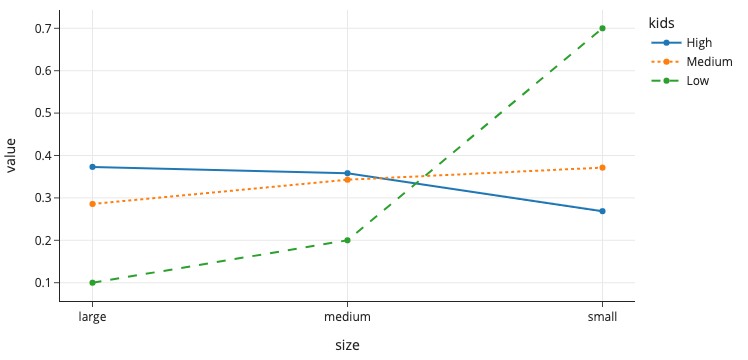

In [32]:
px.line(prop_table_t, y=prop_table_t.columns, 
        x=prop_table_t.index, line_dash='kids',
        markers=True, width=450, height=250)

We can also present these proportions as a collection of side-by-side bar plots as shown here.

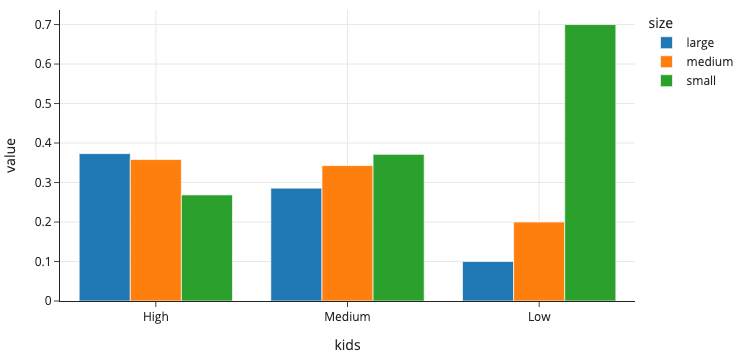

In [35]:
px.bar(prop_table, y=prop_table.columns, x=prop_table.index,
        barmode='group', width=500, height=250)

So far, we've covered exploratory visualizations that incorporate one or two features.
In the next section, we discuss visualizations that incorporate more than two features.